<a href="https://colab.research.google.com/github/vivisuzuki/trabalho-final-analise-dados/blob/main/TrabalhoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

## **Importando os dados pra os Dataframes**

In [16]:
train_df = pd.read_csv('/content/drive/MyDrive/TADS/03 - Analise de dados/Trabalho Final/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/TADS/03 - Analise de dados/Trabalho Final/test.csv')

## **Consultando as primeiras informações do dataframe train**

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Variáveis Estatísticas e Tipos de Dados**

>**Variáveis qualitativas:**
*   **Survided**: nominal/categórica (apesar de ser um número, 1 significa sobrevivente e 0 significa não sobrevivente)
*   **PClass**: Ordinal (apesar de ser um número, significam: 1 = 1st, 2 = 2nd, 3 = 3rd)
*   **Sex**: nominal/categórica
*   **Embarked**: nominal/categórica


>**Variáveis quantitativas:**
*   **Age**: contínua
*   **SibSp**: Discreta
*   **Parch**: Discreta
*   **Fare**: Contínua


**Demais dados do dataframe:**
*   **PassengerID:** dado para identificar os passageiros
*   **Name:** dado para identificar os passageiros
*   **Cabine:** dado que até poderia ser relevante se tivéssemos um mapa do navio com a localização das cabines e também se não possuísem tantos valores nulos na população do dataframe train


Destas variáveis, trabalharemos com os dados: survived, pclass, sex, age e fare.

## Tratamento dos dados
Observamos que alguns dados da variável Age estão nulos. Para este item temos que, aproximadamente:

*   Média = 29,70
*   Mediana = 28,0

Dessa forma, como estas duas medidas são próximas, subtituimos os valores nulos pelo valor da mediana (28,0).

In [17]:
train_df['Age'] = train_df['Age'].fillna(29.0)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Após essa tratativa, a nova média da Idade se tornou 29,56 e a mediana se tornou 29,0.

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.560236,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.005010,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Análise Gráfica
Com os dados tratados, realizamos as primeiras visualizações gráficas dos dados selecionados para serem analisados.

**Sobreviventes**

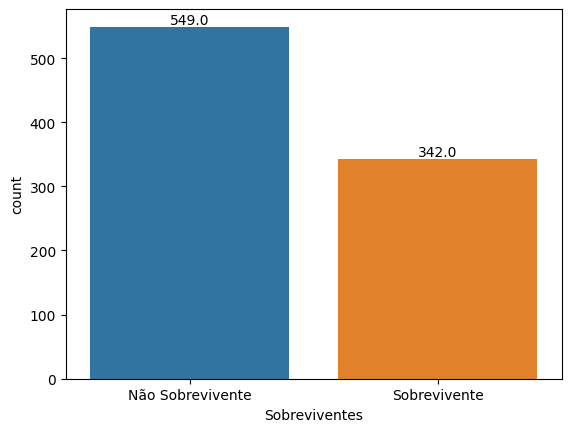

In [6]:
train_df.loc[train_df['Survived'] == 1, 'Sobreviventes'] = 'Sobrevivente'
train_df.loc[train_df['Survived'] == 0, 'Sobreviventes'] = 'Não Sobrevivente'
ax = sns.countplot(data=train_df, x='Sobreviventes')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

**Idade**

<Axes: xlabel='Age', ylabel='Count'>

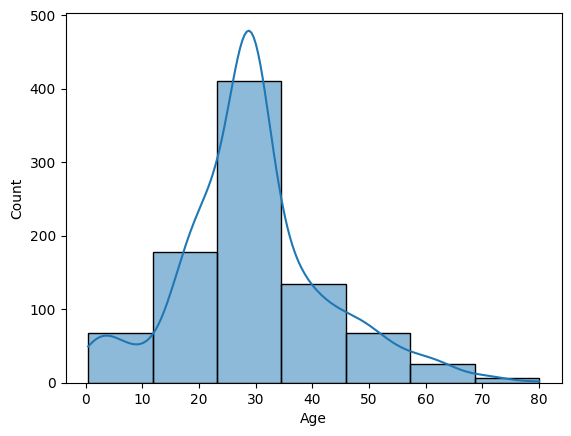

In [9]:
sns.histplot(data=train_df, x='Age', bins=7, kde=True)

**Sexo**

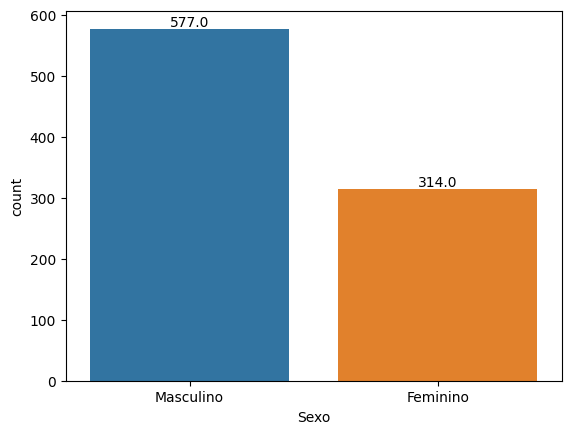

In [12]:
train_df.loc[train_df['Sex'] == 'male', 'Sexo'] = 'Masculino'
train_df.loc[train_df['Sex'] == 'female', 'Sexo'] = 'Feminino'
ax = sns.countplot(data=train_df, x='Sexo')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

**Classe Social**

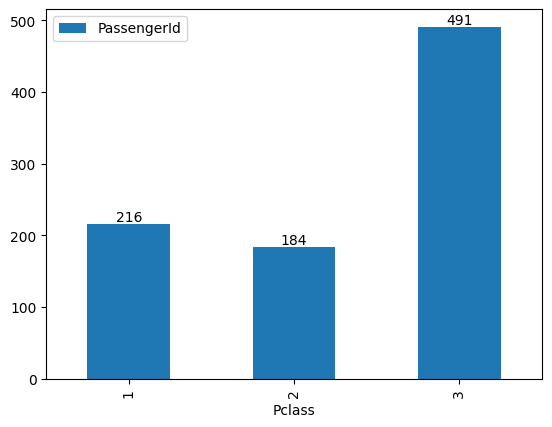

In [23]:
ax = train_df[['PassengerId','Pclass']].groupby('Pclass').count().plot.bar()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

**Valor da passagem**

<Axes: xlabel='Fare'>

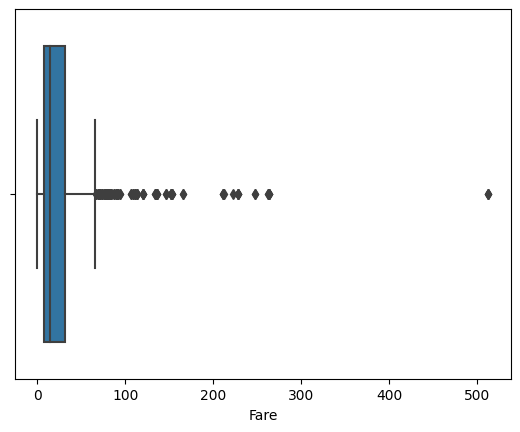

In [33]:
sns.boxplot(data=train_df, x='Fare')

Devemos cruzar as variável estatística de sobreviventes com as demais para avaliarmos as correlações


**Sobreviventes por sexo**



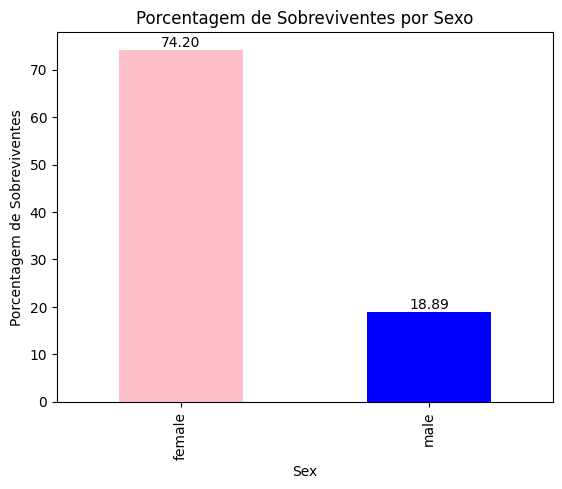

In [42]:
survived_percentages = train_df.groupby('Sex')['Survived'].mean() * 100

ax = survived_percentages.plot(kind='bar', color=['pink', 'blue'])

plt.xlabel('Sex')
plt.ylabel('Porcentagem de Sobreviventes')

plt.title('Porcentagem de Sobreviventes por Sexo')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

Através deste gráfico vemos que a taxa de sobrevivência de mulheres é bem maior (74,20%) do que a taxa de sobrevivência dos homens (18,89%)

**Sobreviventes por Classe Social**

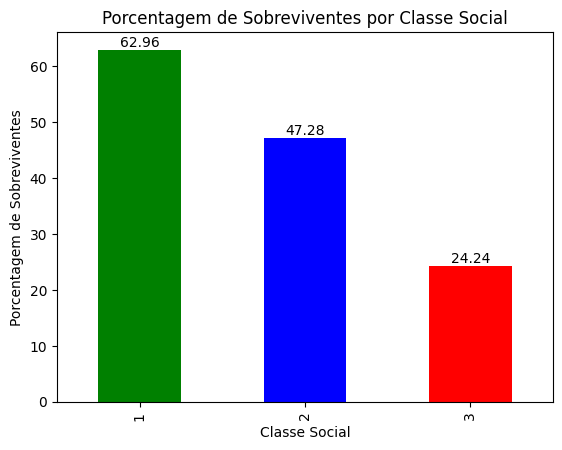

In [9]:
survived_percentages = train_df.groupby('Pclass')['Survived'].mean() * 100

ax = survived_percentages.plot(kind='bar', color=['green', 'blue', 'red'])

plt.xlabel('Classe Social')
plt.ylabel('Porcentagem de Sobreviventes')

plt.title('Porcentagem de Sobreviventes por Classe Social')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

Através deste gráfico percebemos que a taxa de sobrevivência é diretamente proporcional a Classe Social, uma vez observado que quanto maior a classe social maior a taxa de sobrevivência.

## Correlação entre os itens e sobrevivência


Criando um dataframe **correlacao** somente com as variáveis de interesse e transformando seu itens em valores numéricos através do get_dummies, temos que:


*  confirmamos que em relação a sobrevivência, o sexo possui um alto índice de correlação
*  o sexo feminino tem uma relação diretamente proporcional com a taxa de sobrevivência
*  o sexo masculino tem uma relação inversamente proporcional com a taxa de sobrevivência
*  A Classe Social tem um alto índice de correlação com a sobrevivência


<Axes: >

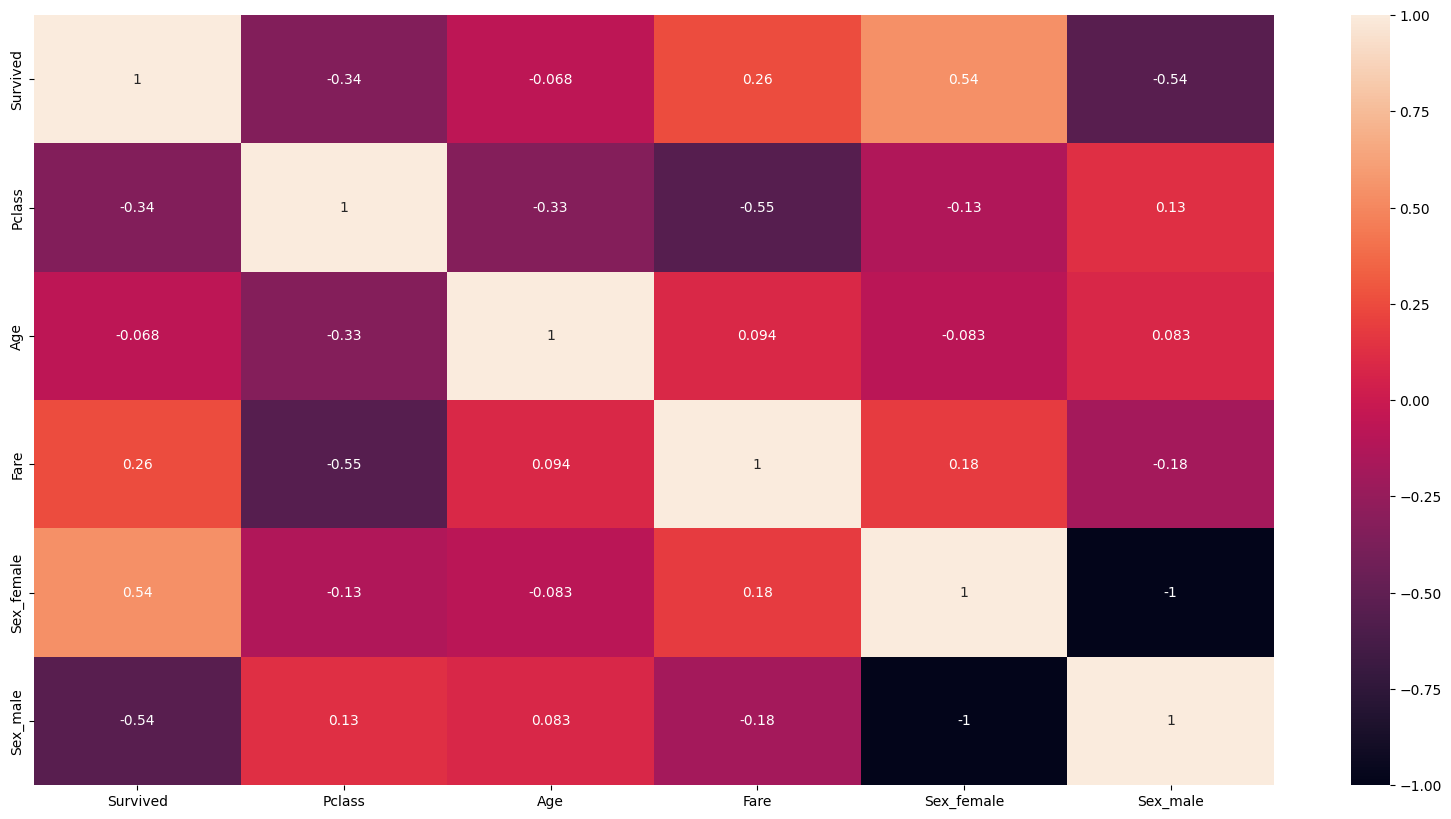

In [47]:
correlacao = train_df.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'])
correlacao = pd.get_dummies(correlacao)
plt.figure(figsize=(20,10))
sns.heatmap(correlacao.corr(), annot=True)

## Amostragem

A partir desse ponto, separaremos o nosso objeto principal de estudo (Survived) das demais variáveis do dataframe



In [69]:
#y é nosso objeto de estudo
y = train_df['Survived']
y = pd.get_dummies(y)
y.info()

#X são as demais colunas
X = train_df.drop(columns=['Survived', 'PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'])

#Transformando itens em números
X = pd.get_dummies(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       891 non-null    uint8
 1   1       891 non-null    uint8
dtypes: uint8(2)
memory usage: 1.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   Fare        891 non-null    float64
 3   Sex_female  891 non-null    uint8  
 4   Sex_male    891 non-null    uint8  
dtypes: float64(2), int64(1), uint8(2)
memory usage: 22.7 KB


Através do método train_test_split separaremos a amostra de treino e teste

In [70]:
X_train, X_teste, y_train, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

## Regressão Linear

Criando o modelo e treinando ele


In [91]:
modelo = LinearRegression()

In [92]:
modelo.fit(X_train, y_train)

LinearRegression()

Criando sua predição

In [93]:
modelo_predict = modelo.predict(X_teste)

## Árvore de Decisão

In [84]:
arvore = RandomForestClassifier()

In [85]:
arvore.fit(X_train,y_train)

RandomForestClassifier()

In [86]:
y_pred = arvore.predict(X_teste)

In [89]:
accuracy_score(y_teste, y_pred)

0.8044692737430168

## Floresta de Decisão

In [80]:
floresta = RandomForestClassifier()

In [81]:

floresta.fit(X_train, y_train)

RandomForestClassifier()

In [83]:
y_forest_pred = floresta.predict(X_teste)

In [88]:
accuracy_score(y_teste, y_forest_pred)

0.7988826815642458